----------
----------
# Voronoi diagram for capital cities of the world

epsg:4326


/Users/shg096/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/candex/candex.py:1852: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  stations_buffert = stations.buffer(buffer) # add a buffer


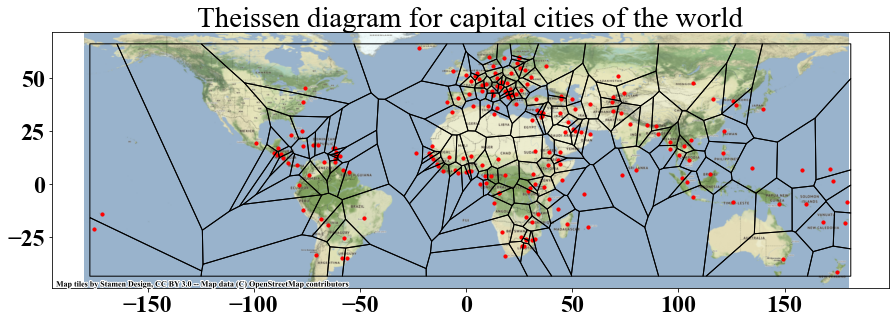

In [1]:
# loading candex
from candex.candex import candex
import contextily as ctx
import matplotlib.pyplot as plt
import matplotlib
import geopandas as gpd
font = {'family' : 'Times New Roman',
         'weight' : 'bold',
         'size'   : 24}
matplotlib.rc('font', **font)

# initializing candex object and call voronoi function
cndx = candex()
cndx.voronoi_diagram('../data/target_shapefiles/Capitals_point.shp',
                      '../temporary/Capitals_point_voronio.shp')

# visualize
capitals = gpd.read_file('../data/target_shapefiles/Capitals_point.shp')
voronoi = gpd.read_file('../temporary/Capitals_point_voronio.shp')
fig, ax = plt.subplots(figsize=(15, 10))
capitals.plot(ax=ax, color='red', markersize = 10)
voronoi.plot(ax=ax, facecolor="none", edgecolor='black')
# ax.axis('off')
# plt.axis('equal')
ctx.add_basemap(ax, zoom=4, crs='EPSG:4326')
plt.title ('Theissen diagram for capital cities of the world')
# plt.savefig('../fig/Example3_A.png')
plt.show()


---------
---------
# Get the elevation of few cities in Provience of Alberta, Canada from the digital elevation model

In [2]:
# loading candex
from candex.candex import candex
# initializing candex object
cndx = candex()
import pandas as pd
d = {'ID': [1, 2, 3], 'city': ['Calgary', 'Banff', 'Canmore'],
     'lat': ['51.05', '51.18', '51.08'], 'lon': ['-114.07', '-115.56', '-115.36']}
df = pd.DataFrame(data=d)
shp_points = cndx.make_shape_point(df,
                                   'lon',
                                   'lat')
shp_points['elevation [m]'] = cndx.extract_value_tiff (shp_points['lon'],
                                                       shp_points['lat'],
                                                       '../data/MERIT_HYDRO/MERIT_dem.tif')
print(shp_points)



no crs is provided for the point shapefiles; EASYMORE will allocate WGS84
   ID     city    lat      lon                     geometry  elevation [m]
0   1  Calgary  51.05  -114.07  POINT (-114.07000 51.05000)    1062.599976
1   2    Banff  51.18  -115.56  POINT (-115.56000 51.18000)    1508.099976
2   3  Canmore  51.08  -115.36  POINT (-115.36000 51.08000)    1309.500000
